# Visualising Clusters

The following is a mini-project / analysis that shows a few visualisation tools

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('Pokemon.csv')
data.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [12]:
data = data.drop(columns = ['Type 1', 'Type 2', 'Generation', 'Legendary'])

In [13]:
data.head(2)

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,318,45,49,49,65,65,45
1,2,Ivysaur,405,60,62,63,80,80,60


## 1. Let us work with KMeans

In [21]:
from sklearn.cluster import KMeans

# k means
kmeans = KMeans(n_clusters = 3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['Attack', 'Defense']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to df
data['cen_x'] = data.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
data['cen_y'] = data.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
data['c'] = data.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


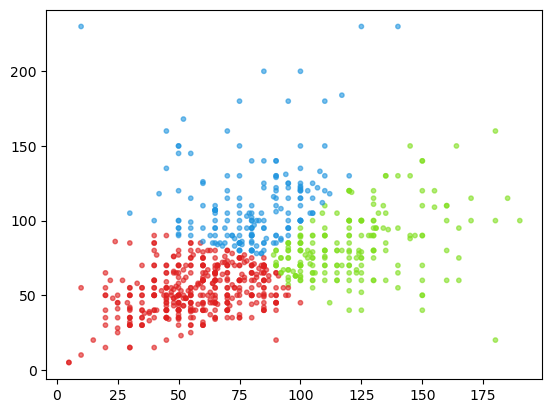

In [27]:
plt.scatter(data.Attack, data.Defense, c=data.c, alpha = 0.6, s=10)
plt.show()

## 2. Multiple Dimensions

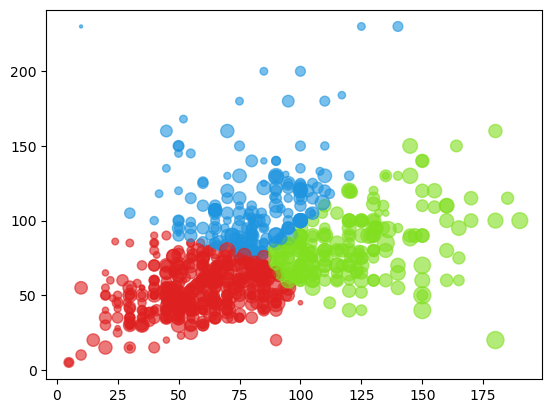

In [28]:
plt.scatter(data.Attack, data.Defense, c=data.c, s=data.Speed, alpha = 0.6)


## 3. Annotations

C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


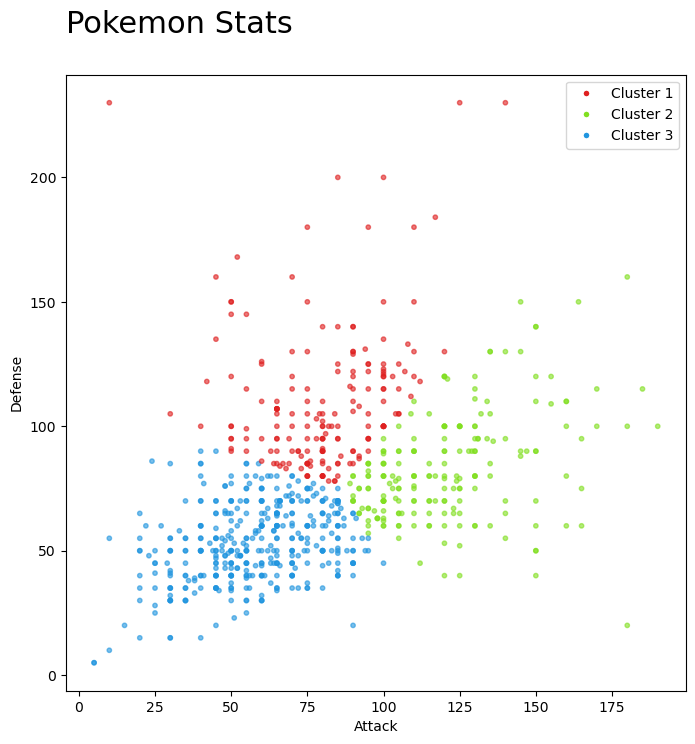

In [35]:
### BUILD A TWO DIMENSIONS CLUSTER AGAIN ###
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(data[['Attack', 'Defense']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
data['cen_x'] = data.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
data['cen_y'] = data.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
data['c'] = data.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(data.Attack, data.Defense, c=data.c, alpha = 0.6, s=10)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

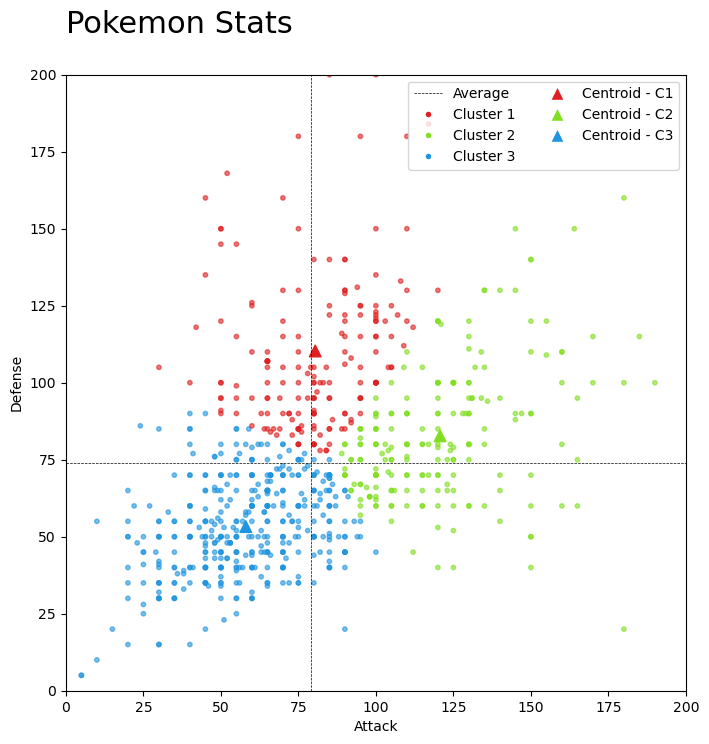

In [36]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(data.Attack, data.Defense, c=data.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot Attack mean
plt.plot([data.Attack.mean()]*2, [0,200], color='black', lw=0.5, linestyle='--')
plt.xlim(0,200)
# plot Defense mean
plt.plot([0,200], [data.Defense.mean()]*2, color='black', lw=0.5, linestyle='--')
plt.ylim(0,200)
# create a list of legend elemntes
## average line
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
## markers / records
cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)
# plot legend
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

## 4. Lines

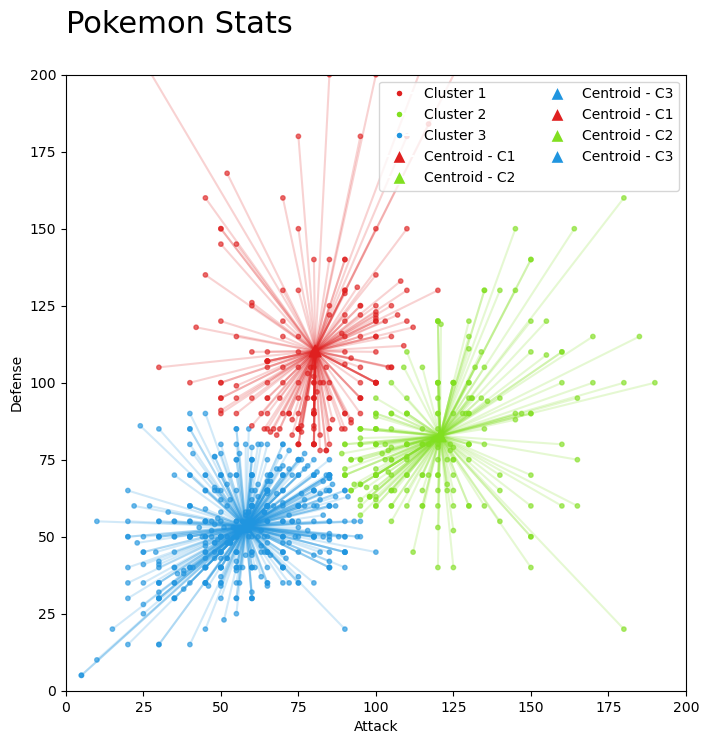

In [39]:
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(data.Attack, data.Defense, c=data.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in data.iterrows():
    x = [val.Attack, val.cen_x,]
    y = [val.Defense, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# x and y limits
plt.xlim(0,200)
plt.ylim(0,200)
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

## 5. Convex Hull

(0.0, 200.0)

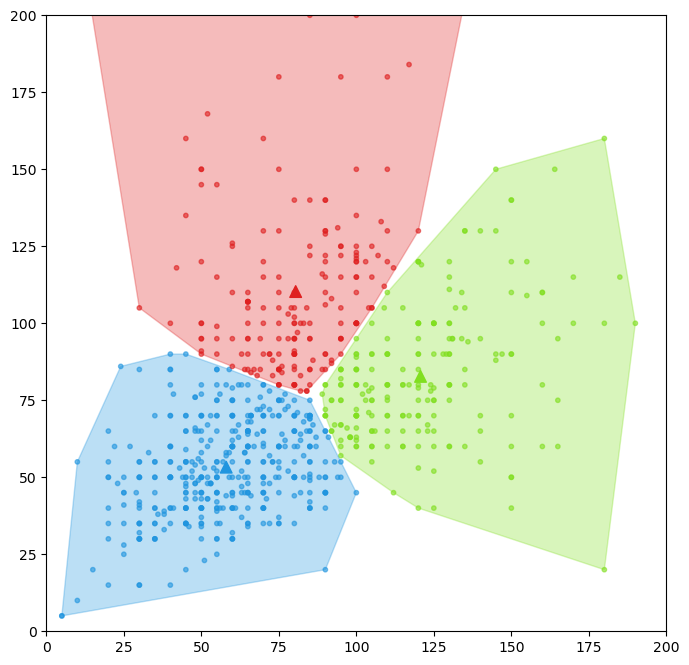

In [40]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(data.Attack, data.Defense, c=data.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in data.cluster.unique():
    points = data[data.cluster == i][['Attack', 'Defense']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
plt.xlim(0,200)
plt.ylim(0,200)

(0.0, 200.0)

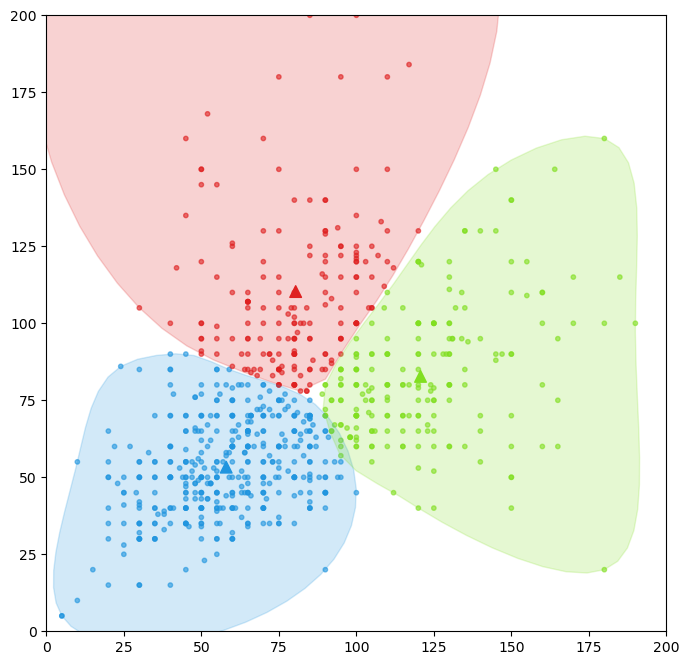

In [42]:
from scipy import interpolate
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(data.Attack, data.Defense, c=data.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    
for i in data.cluster.unique():
    # get the convex hull
    points = data[data.cluster == i][['Attack', 'Defense']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0, per=1)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)
    
plt.xlim(0,200)
plt.ylim(0,200)